In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.cm as cm


Total files: 8
1. TopLandscape_kin_PMTrans_PMTrans_RxH_120_RxH_128_5e-4_0d2_r_adam_wd0_gradacc1_0d7_40_FT_performance_20241117_152107.csv - Max Accuracy: 0.936171875
2. TopLandscape_kin_PMTrans_PMTrans_RxH_120_RxH_128_5e-4_0d2_r_adam_wd0_gradacc1_0d5_40_FT_performance_20241117_152106.csv - Max Accuracy: 0.93551171875
3. TopLandscape_kin_PMTrans_PMTrans_RxH_120_RxH_128_5e-4_0d1_r_adam_wd0_gradacc1_0d5_40_FT_performance_20241117_152108.csv - Max Accuracy: 0.9346875
4. TopLandscape_kin_PMTrans_PMTrans_RxH_120_RxH_128_5e-4_0d1_r_adam_wd0d01_gradacc1_0d5_40_FT_performance_20241117_152107.csv - Max Accuracy: 0.92897265625
5. TopLandscape_kin_PMTrans_PMTrans_RxH_120_RxH_128_5e-4_0d2_r_adam_wd0_gradacc1_0d3_40_FT_performance_20241119_075900.csv - Max Accuracy: 0.9268359375


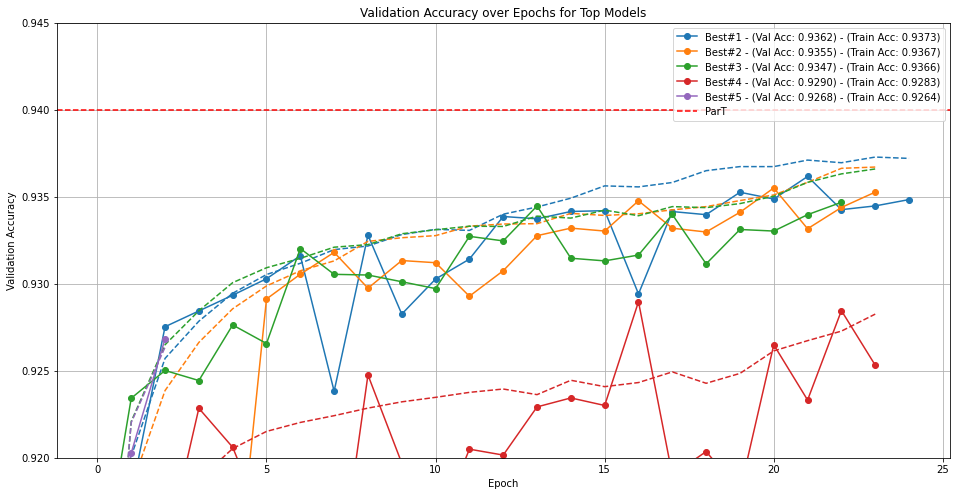

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the CSV files
# directory = "TopLandscape_performance_summary_hyper_scan_output_ft_v3_again"
# directory = "TopLandscape_performance_summary_hyper_scan_output_ft_v5"
directory = "TopLandscape_performance_summary_top_long_trains"


# List to store filenames and their max accuracy
file_acc_list = []


# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        try:
            # Read the CSV file
            df = pd.read_csv(filepath)
            # Ensure 'val_acc' column exists in the CSV
            if 'val_acc' in df.columns:
                # Get the maximum accuracy in the 'val_acc' column
                max_acc = df['val_acc'].max()
                epochs = df['epoch'].max()
                # Store the filename and max accuracy
                if not np.isnan(max_acc):
                    file_acc_list.append((filename, max_acc,epochs))
        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Sort the list by accuracy in descending order and get the top 10
top_files = sorted(file_acc_list, key=lambda x: x[1], reverse=True)[:5]
all_files = sorted(file_acc_list, key=lambda x: x[1], reverse=True)
filtered_file_acc_list = sorted([item for item in file_acc_list if 'ranger' in item[0]],key=lambda x: x[1],reverse=True)[:5]
print(f'Total files: {len(file_acc_list)}')

# Display the top 10 files with the highest accuracy
for i, (filename, max_acc,epochs) in enumerate(top_files, start=1):
    print(f"{i}. {filename} - Max Accuracy: {max_acc}")

    
# Plot all validation accuracy curves on the same plot
plt.figure(figsize=(16, 8))
colormap = plt.get_cmap('tab20', 10)
for i, (filename, max_acc,epochs) in enumerate(top_files):
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath)[1:]
    
    # Ensure 'val_acc' column exists in the CSV
    if 'val_acc' in df.columns:
        if i < 5:
            # Label top 5 files as "Best#1", "Best#2", etc.
            train_acc = df[['train_acc']][np.array(df.index) % 2 == 1].max().item()
            plt.plot(df[['epoch']][np.array(df.index) % 2 == 0],df[['val_acc']][np.array(df.index) % 2 == 0],marker='o', label=f'Best#{i+1} - (Val Acc: {max_acc:.4f}) - (Train Acc: {train_acc:.4f})', color = colormap(i))
            plt.plot(df[['epoch']][np.array(df.index) % 2 == 1],df[['train_acc']][np.array(df.index) % 2 == 1], linestyle = '--', color =colormap(i))
            
#         else:
            # Plot remaining files without a legend
#             plt.plot(df[['val_acc']][np.array(df.index) % 2 == 1], color='gray', alpha=0.5)

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.ylim(0.92,0.945)

plt.axhline(0.94, color = 'r', linestyle = '--', label = 'ParT')
plt.title('Validation Accuracy over Epochs for Top Models')
plt.grid(True)
# plt.xticks(np.arange(0, 30, 1))
plt.legend(loc='best')
plt.show()

# # Filtered Model
# plt.figure(figsize=(16, 8))
# colormap = plt.get_cmap('tab20', 10)
# for i, (filename, max_acc,epochs) in enumerate(filtered_file_acc_list):
#     filepath = os.path.join(directory, filename)
#     df = pd.read_csv(filepath)
    
#     # Ensure 'val_acc' column exists in the CSV
#     if 'val_acc' in df.columns:
#         if i < 5:
#             # Label top 5 files as "Best#1", "Best#2", etc.
#             train_acc = df[['train_acc']][np.array(df.index) % 2 == 0].max().item()
#             plt.plot(df[['epoch']][np.array(df.index) % 2 == 1],df[['val_acc']][np.array(df.index) % 2 == 1],marker='o', label=f'Best#{i+1} - (Val Acc: {max_acc:.4f}) - (Train Acc: {train_acc:.4f})', color = colormap(i))
#             plt.plot(df[['epoch']][np.array(df.index) % 2 == 0],df[['train_acc']][np.array(df.index) % 2 == 0], linestyle = '--', color =colormap(i))
            
# #         else:
#             # Plot remaining files without a legend
# #             plt.plot(df[['val_acc']][np.array(df.index) % 2 == 1], color='gray', alpha=0.5)

# # Add labels and legend
# plt.xlabel('Epoch')
# plt.ylabel('Validation Accuracy')
# plt.ylim(0.92,0.945)

# plt.axhline(0.94, color = 'r', linestyle = '--', label = 'ParT')
# plt.title('Validation Accuracy over Epochs for Filtered Models')
# plt.grid(True)
# plt.xticks(np.arange(0, 30, 1))
# plt.legend(loc='best')
# plt.show()



# cmap = cm.viridis
# plt.figure(figsize=(20, 8))
# colormap = plt.get_cmap('tab20', 10)
# nfiles = len(all_files)
# for i, (filename, max_acc,epochs) in enumerate(all_files):
#     filepath = os.path.join(directory, filename)
#     df = pd.read_csv(filepath)
#     max_epochs = df['epoch'].max()
# #     if 'ranger' not in filename.split('_'):
# #         continue
#     # Ensure 'val_acc' column exists in the CSV
#     if 'val_acc' in df.columns:
#         max_epochs
# #         if max_epochs < 29: 
#         if df[['val_acc']][np.array(df.index) % 2 == 1].max().item() > 0.9125:
#             plt.plot(df[['epoch']][np.array(df.index) % 2 == 1], df[['val_acc']][np.array(df.index) % 2 == 1], color = cmap(i/nfiles), alpha = 0.1+ 0.9*(i/(nfiles)))
            

# # Add labels and legend
# plt.xlabel('Epoch')
# plt.ylabel('Validation Accuracy')
# plt.ylim(0.90,0.95)
# plt.grid(True)
# # plt.xticks(np.arange(0, 30, 1))

# plt.axhline(0.94, color = 'r', linestyle = '--', label = 'ParT')
# plt.title('Validation Accuracy over Epochs for All Top Models')
# plt.legend(loc='best')
# plt.show()

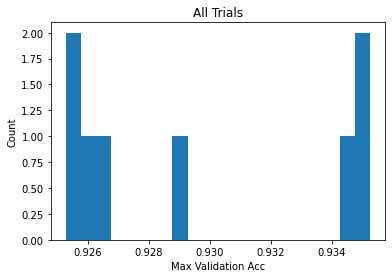

8 converged out of 8


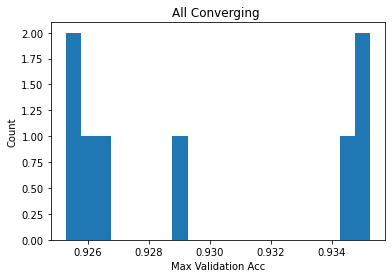

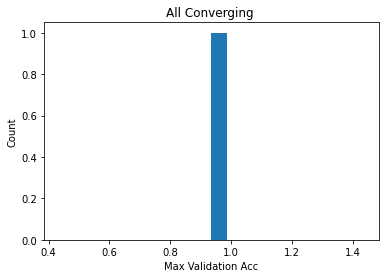

In [107]:
all_best = np.array(file_acc_list)[:,1].astype(float)
plt.figure(figsize = (6,4))
plt.hist(all_best,bins = 20)
plt.title('All Trials')
plt.xlabel('Max Validation Acc')
plt.ylabel('Count')
plt.show()
converged = all_best[all_best>0.6]
print(f'{len(converged)} converged out of {len(all_best)}')

plt.figure(figsize = (6,4))
plt.hist(all_best[all_best>0.6],bins = 20)
plt.title('All Converging ')
plt.xlabel('Max Validation Acc')
plt.ylabel('Count')
plt.show()

plt.figure(figsize = (6,4))
plt.hist(all_best[all_best>0.935],bins = 20)
plt.title('All Converging ')
plt.xlabel('Max Validation Acc')
plt.ylabel('Count')
plt.show()

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming file_acc_list contains the (key, score) pairs, where key includes parameter info
# Extract parameters and scores
keys = [key.replace('r_adam', 'radam').replace('riemann_ranger', 'riemannranger') for key, score, epoch in file_acc_list]
params = [key.split('_')[8:-3] for key in keys]  # Updated parameter extraction range
scores = [score for key, score, epoch in file_acc_list]
epochs = [epoch for key, score, epoch in file_acc_list]


# Define column names based on unique_id structure
# param_names = [
#     'partD',          # Part dimension
#     'jetD',           # Jet dimension
#     'nheads',         # Number of heads
#     'layers',         # Number of layers
#     'lr',             # Learning rate
#     'dropout',        # Dropout rate
#     'curvatureInit',  # Curvature initialization
#     'PMWeightinit',   # PM weight initialization factor
#     'interManAtt',    # Inter-manifold attention frequency
#     'lrsched',        # Learning rate schedule
#     'nepochs',        # Number of epochs
#     'optimizer',      # Optimizer type
#     'batchsize',      # Batch size
#     'conv_embed',     # Conv_embed setting (True/False)
#     'clamp',          # Clamp value
#     'betas',          # Betas value
#     'weightdecay'     # Weight decay value
# ]

param_names = [
    'lr',             # Learning rate
    'dropout',        # Dropout rate
    'optimizer',      # Optimizer type
    'weightdecay',     # Weight decay value
    'gradAccum',      # Gradient accumulation
    'decayEpochs',    # % of epochs for LR decay
]

# unique_id="$(echo $learning_rate | sed 's/\./d/g')_$(echo $dropout_rate | sed 's/\./d/g')_${opt}_wd$(echo $w_decay | sed 's/\./d/g')_gradacc${grad_accum}_$(echo $decay_step | sed 's/\./d/g')FT"

# Convert parameter values with 'd' to '.' and 'x' back to ',' for correct decimal representation
params = [[value.replace('gradacc', '') for value in param_set] for param_set in params]

params = [[value.replace('d', '.').replace('x', ',').replace('ra.am', 'radam') for value in param_set] for param_set in params]

# Create a DataFrame for easier analysis
df = pd.DataFrame(params, columns=param_names)
df['score'] = scores  # Add score column
df['epochs'] = epochs

df = df[df['score'] < 0.6]  # Filter scores

# Convert numeric columns to numeric types, skipping categorical columns
# for col in param_names:
#     if col in ['lrsched', 'optimizer', 'conv_embed', 'betas','weightdecay','clamp']:  # Specify categorical columns
#         continue
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# Plotting each parameter vs. score, adjusting for numeric or categorical
for param in param_names:
    if df[param].nunique() <= 1:
        continue  # Skip if there's no variation in the parameter
    plt.figure(figsize=(8, 6))
    
    if pd.api.types.is_numeric_dtype(df[param]):
        sns.scatterplot(x=df[param], y=df['score'])
        if param == 'lr':
            plt.xscale('log')
    else:
        sns.boxplot(x=df[param], y=df['score'])
    
    plt.xlabel(param)
    plt.ylabel('Performance Score')
#     plt.ylim(0.925, 0.945)
    plt.title(f'{param} vs. Performance Score')
    plt.show()


# Display pairwise correlation heatmap for numeric parameters only
# plt.figure(figsize=(10, 8))
# correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Numeric Parameters and Performance Score')
# plt.show()

ValueError: 6 columns passed, passed data had 8 columns

In [109]:
df

,params,epoch,train_acc,train_loss,val_acc,val_loss
1,NaN,0.0,0.885584,0.280556,NaN,NaN
2,NaN,0.0,NaN,NaN,0.902098,0.242492
3,NaN,1.0,0.909767,0.222842,NaN,NaN
4,NaN,1.0,NaN,NaN,0.915203,0.216658
5,NaN,2.0,0.914443,0.211544,NaN,NaN
6,NaN,2.0,NaN,NaN,0.909148,0.229604
7,NaN,3.0,0.917034,0.205434,NaN,NaN
8,NaN,3.0,NaN,NaN,0.918512,0.221804
9,NaN,4.0,0.918608,0.201992,NaN,NaN
10,NaN,4.0,NaN,NaN,0.918668,0.201884


In [756]:
# df[(df['lr'] == '1e-3') & (df['optimizer'] != 'radam')].sort_values(by = 'score',ascending = False)
df[(df['optimizer'] != 'radam')].sort_values(by = 'score',ascending = False).head(20)

,lr,dropout,optimizer,weightdecay,gradAccum,decayEpochs,score,epochs
65,5e-4,0.1,riemannranger,w.0,4,0.5FT,0.936781,29.0
155,5e-4,0.1,riemannranger,w.1e-4,1,0.5FT,0.936625,29.0
176,5e-4,0.1,riemannranger,w.0,1,0.3FT,0.936625,29.0
112,5e-4,0.1,riemannranger,w.0,4,0.7FT,0.936566,29.0
231,5e-4,0.1,riemannranger,w.0,2,0.5FT,0.936410,29.0
49,5e-4,0.1,riemannranger,w.0,4,0.3FT,0.936227,29.0
137,5e-4,0.1,riemannranger,w.0,2,0.3FT,0.936148,29.0
286,5e-4,0.1,riemannranger,w.1e-4,2,0.3FT,0.936051,29.0
67,5e-4,0.1,riemannranger,w.1e-4,4,0.7FT,0.935969,29.0
187,5e-4,0.1,riemannranger,w.1e-4,1,0.3FT,0.935891,29.0
